In [111]:
import matplotlib.pyplot as plt
import pandas as pd

In [112]:
#Read the csv file
df = pd.read_csv("TopCountries_WarSpike_Proc.csv", sep=',')
df.columns = ["",'country_name','count','host'] 

In [113]:
#Make a list of all countires for future use
countries = df['country_name'].unique().tolist()

#Set the figure size
plt.rcParams["figure.figsize"] = [20.00, 10.00]
plt.rcParams["figure.autolayout"] = True

#Group the data
df = df.groupby(['country_name', 'host'])['count'].sum().reset_index()

#Remove the largest domains
df = df[~df.apply(lambda row: row.astype(str).str.contains('utwente').any(), axis=1)]

In [114]:
#Top hosts
websites_df = df.groupby(['host'])['count'].sum().reset_index()
websites_df = websites_df.sort_values(by='count', ascending = False)
top_df = websites_df.head(16)
website_list = top_df['host'].tolist()
df = df[df['host'].isin(website_list)]
print(website_list)

['google.com', 'twitter.com', 'check-host.net', 'facebook.com', 'reddit.com', 'usatoday.com', 'bing.com', 'soda.demo.socrata.com', 'qwant.com', 'youtube.com', 'play.google.com', 'steamcommunity.com', 'ted.com', 'cia.gov', 'vk.com', 'fbi.com']


Text(0.5, 1.0, 'Hosts duting the March 2022 for the top countries')

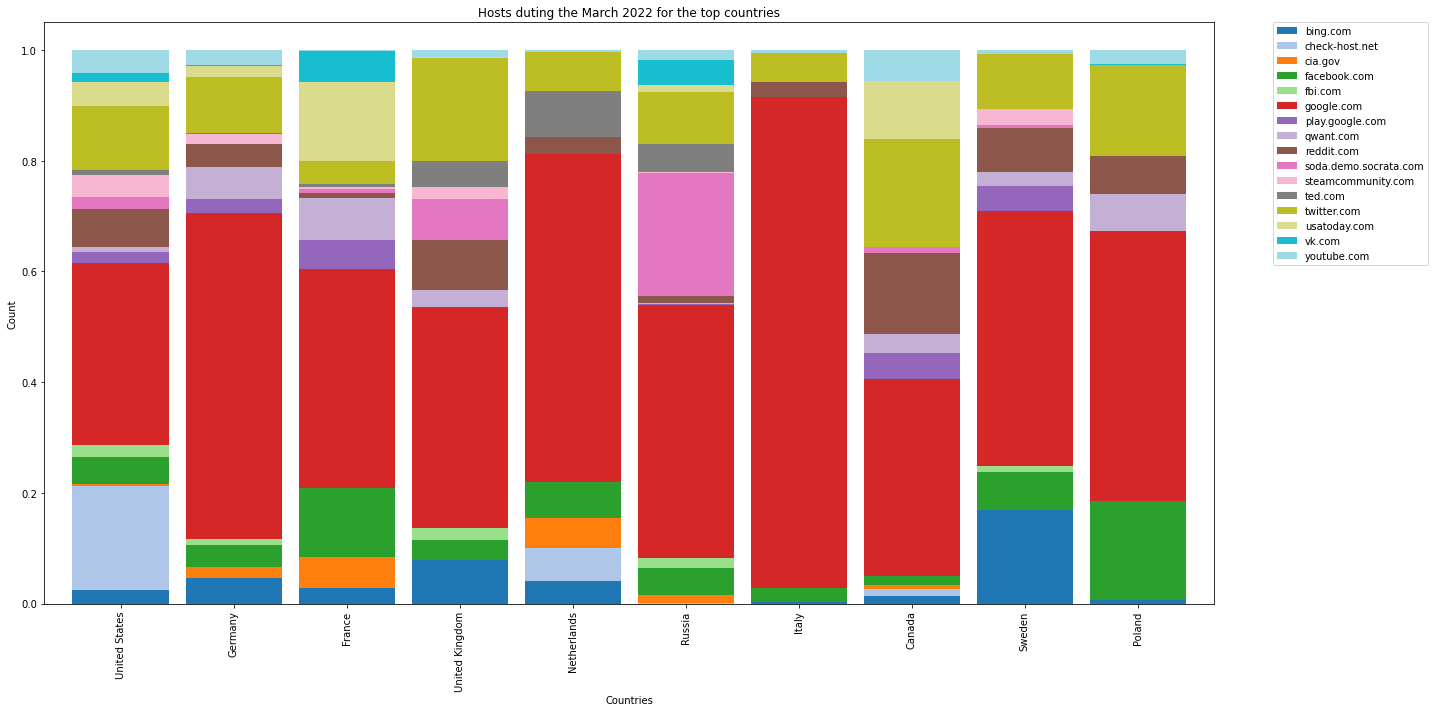

In [115]:
#Bar for each country
pivot_df = df.pivot(index='country_name', columns='host', values='count')
pivot_df['total'] = pivot_df.sum(axis=1)
pivot_df.sort_values(by='total', ascending=False, inplace=True)
pivot_df = pivot_df[~pivot_df.index.duplicated(keep='first')]

#Remove 'total' bar from the plot
pivot_df = pivot_df.drop(columns=['total'])    

pivot_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)
    
#Plot the bar chart
pivot_df.plot.bar(stacked=True, width=0.85,colormap='tab20')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Hosts duting the March 2022 for the top countries')